<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 1 // Publication-Grade Plot</font></h1>

#### Submitted by Rahmat Hardian Putra

# Data Preparation

In [80]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
mpl.style.use(['ggplot'])

%matplotlib inline

# reading csv data
feedback_elearning = pd.read_csv('dataset/Feedback_ELearn_2020.csv')

In [81]:
feedback_elearning.head(15)

,Bulan,Course,Category,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
0,1,Fraud Klaim Asuransi,ADMEDIKA,1,100.00,100.00,0.00,100.00,100.00,70.00,100.00,100.00,100.00,100.00,100.00,100.00,89.17
1,1,Basic Procurement,Business Enabler / Enterprise Management (EL-EEM),1,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1,Paradigma Spiritual,Business Enabler / Enterprise Management (EL-EEM),4,91.25,91.25,91.25,91.25,91.25,91.25,90.67,91.25,91.25,91.25,91.25,91.25,91.20
3,1,PMBOK,Business Enabler / Enterprise Management (EL-EEM),10,88.11,87.43,89.47,88.11,89.47,88.11,86.67,88.95,91.50,89.47,87.78,88.33,88.62
4,1,Spiritual (Islam) Bekerja Ma allah,Business Enabler / Enterprise Management (EL-EEM),2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
5,1,Company Profile PT Dayamitra Telekomunikasi,CLASSICAL SUPPORT,1,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
6,1,Product Knowledge PT Dayamitra Telekomunikasi,CLASSICAL SUPPORT,2,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
7,1,9 Core Element of Marketing,Commerce & Relations (EL-COR),1,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
8,1,Competitor & Competitive Intellegence (APC),Commerce & Relations (EL-COR),3,95.56,93.85,93.85,93.85,93.85,93.85,93.85,97.14,97.14,93.85,93.85,93.85,94.54
9,1,Competitor Intelligence - TCIMF,Commerce & Relations (EL-COR),6,87.27,86.67,87.27,86.67,85.71,85.00,87.00,87.27,87.27,85.71,89.57,86.67,86.84


In [82]:
# Cleaning unwanted String with Regex 
feedback_elearning['Jumlah Partisipan']=feedback_elearning['Jumlah Partisipan'].str.replace(r'\D', '')
feedback_elearning['Jumlah Partisipan']= pd.to_numeric(feedback_elearning['Jumlah Partisipan'])

In [83]:
feedback_elearning.describe()

,Bulan,Jumlah Partisipan,Kecepatan pelayanan,Kemudahan fungsi fungsi untuk digunakan,Kemudahan nama situs untuk diingat,Kemudahan situs untuk dipahami,Kemudahan untuk dihubungi,Kemudahan untuk dipahami,Kenyamanan dalam mempelajari materi,Keramahan petugas,Manfaat terhadap tugas,Pengetahuan terhadap situs,Sistematika Penulisan,Tampilan situs,Final Score
count,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000
mean,6.439300,30.217121,90.758101,91.196537,91.322401,89.169798,90.777977,91.609374,91.112926,90.899541,92.330510,90.899152,91.903323,91.051074,91.086257
std,3.017855,172.720700,11.371856,10.163694,10.244177,17.598739,11.106859,9.070625,9.975912,10.950328,5.845252,10.819960,6.055594,10.348712,8.908971
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,60.000000,0.000000,13.330000
25%,4.000000,1.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
50%,6.000000,4.000000,91.685000,91.990000,92.160000,92.060000,91.640000,92.380000,92.055000,91.795000,92.550000,91.760000,92.110000,91.930000,91.990000
75%,9.000000,12.000000,95.380000,95.560000,95.560000,95.560000,95.380000,95.560000,95.560000,95.380000,95.560000,95.380000,95.560000,95.560000,95.050000
max,11.000000,4455.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Bar Chart
#### Question: 
Bagaimana data akses course per bulannya ?

In [84]:
# selecting and summarizing data
jumlah_peserta_bulan = feedback_elearning[['Bulan', 'Jumlah Partisipan']]
jumlah_peserta_bulan = jumlah_peserta_bulan.groupby(['Bulan']).sum()
jumlah_peserta_bulan.head()

,Jumlah Partisipan
Bulan,
1,1711
2,4956
3,5670
4,9752
5,4115


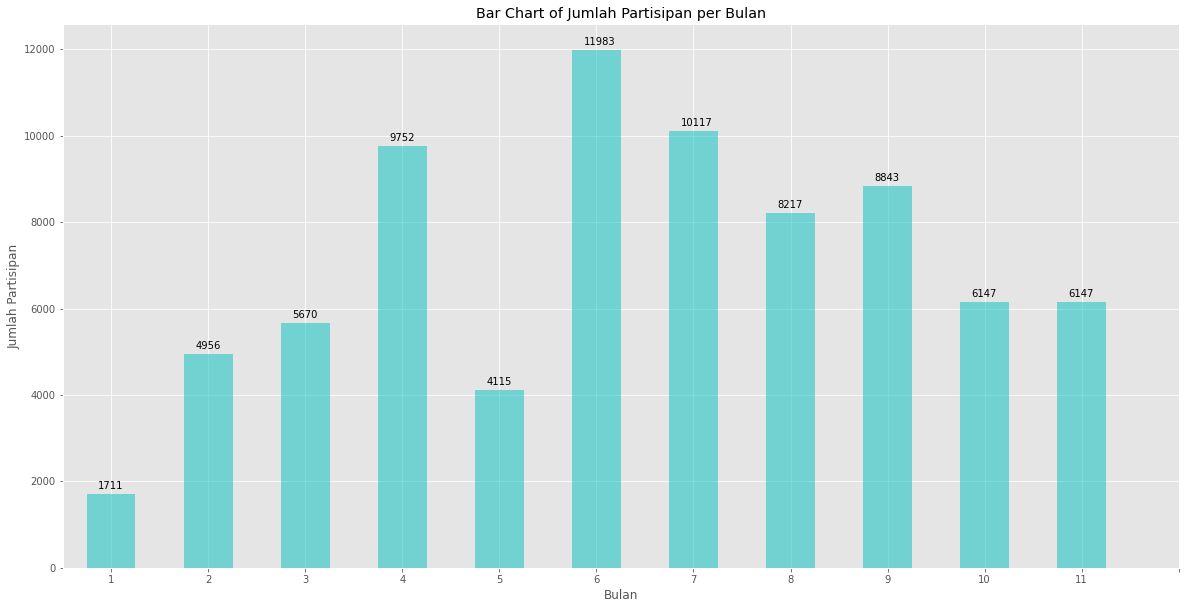

In [85]:
# setting plot for jumlah_peserta_bulan
ax = jumlah_peserta_bulan['Jumlah Partisipan'].plot(
                        kind='bar',
                        alpha=0.5,                         
                        figsize=(20, 10),
                        color='c'
                        )

# get index and columns values to iterate
i = jumlah_peserta_bulan.index.values
j = jumlah_peserta_bulan['Jumlah Partisipan'].values

# iterating in variable to show value on top of corresponding bar
for i,j in zip(i,j):
    ax.annotate(j, xy=(i,j), xytext=(-110, 5), textcoords='offset points')            
    

# Setting ax property and plot
ax.set_title('Bar Chart of Jumlah Partisipan per Bulan')
ax.set_ylabel('Jumlah Partisipan')
ax.set_xlabel('Bulan')
plt.xticks(np.arange(jumlah_peserta_bulan.index.values.min()-1, jumlah_peserta_bulan.index.values.max()+1, step=1), rotation=0)
plt.show()

#### Analisis
Terlihat bahwa diawal tahun jumlah partisipan berada dititik __terendah__, namun terus meningkat hingga bulan ke 4, 
dan __turun drastis__ pada bulan ke-5, kemudian mengalami __peningkatan yang signifikan__ lagi di bulan ke-6. 
Mulai dibulan ke 7 sampai akhir tahun __terus mengalami penurunan__



# Area Plot
#### Question:
Bagaimana sebaran akses category course dalam periode 1 tahun

In [86]:
# Selecting, summarizing and pivoting Data
category_peserta_bulan = feedback_elearning[['Bulan','Category','Jumlah Partisipan']]
category_peserta_bulan = category_peserta_bulan.groupby(['Bulan','Category']).sum().reset_index()
category_peserta_bulan = category_peserta_bulan.pivot(index='Bulan', columns='Category')['Jumlah Partisipan']

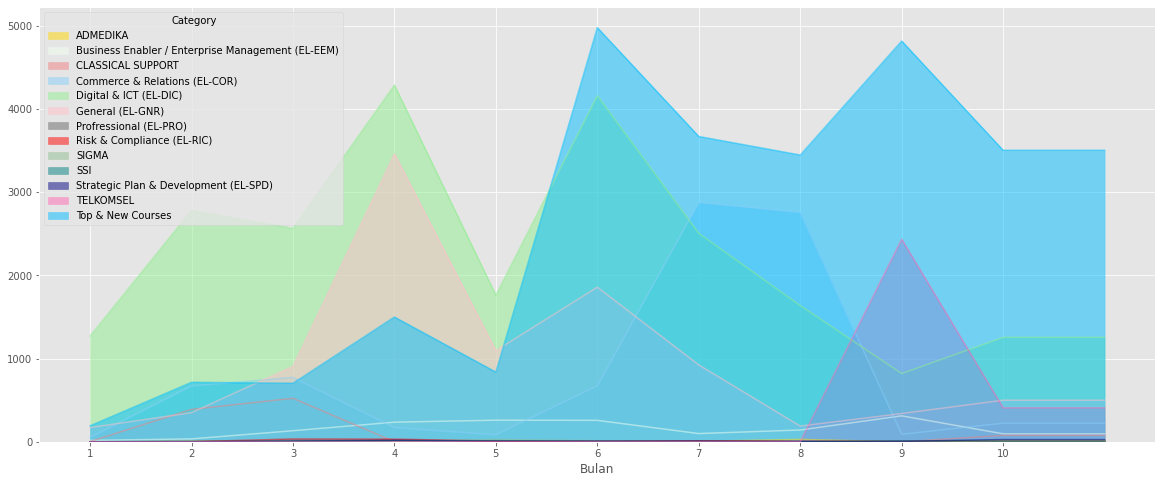

In [87]:
# defining colors
colors_list = ['gold', 'honeydew', 'lightcoral', 
               'lightskyblue', 'lightgreen', 'pink', 
               'dimgray','red','darkseagreen','teal','navy',
              'hotpink','deepskyblue']

# setting plot for category_peserta_bulan
category_peserta_bulan.plot(
                        kind='area',
                        alpha=0.5,                         
                        figsize=(20, 8),                  
                        stacked=False,
                        color=colors_list
                        )

# setting plot
plt.xticks(np.arange(category_peserta_bulan.index.values.min(), category_peserta_bulan.index.values.max(), step=1), rotation=0)
plt.show()

#### Analisis

Kategori Top & New Courses menjadi Course yang __terbanyak diakses dari pertengahan hingga akhir tahun,__ sedangkan kategori Digital & ICT __terbanyak diakses di awal tahun hingga dipertengahan tahun.__

# Pie Chart
#### Question:
Berapa persentase tiap kategori course berdasarkan all akses ?

In [88]:
# selecting and grouping data
category_peserta_percen = feedback_elearning[['Category', 'Jumlah Partisipan']]
category_peserta_percen = category_peserta_percen.groupby(['Category']).sum()

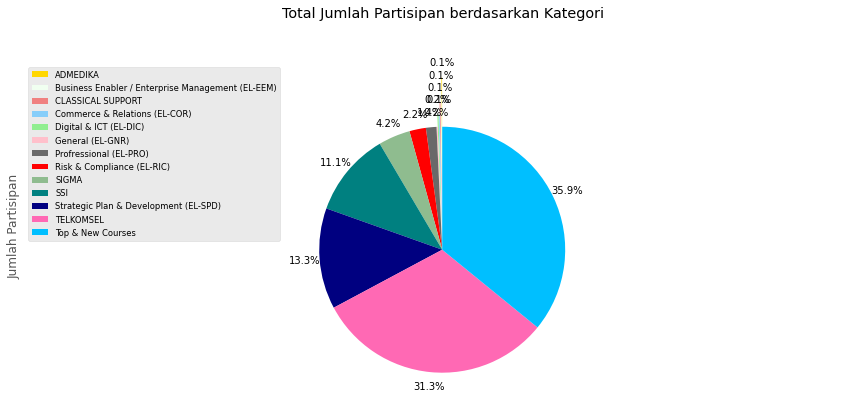

In [89]:
# defining colors
colors_list = ['gold', 'honeydew', 'lightcoral', 
               'lightskyblue', 'lightgreen', 'pink', 
               'dimgray','red','darkseagreen','teal','navy',
              'hotpink','deepskyblue']

# ratio for each continent with which to offset each wedge.
explode_list = [0.4, 0.3, 0.2, 0.1, 0.1, 0.,0,0,0,0,0,0,0] 

# setting plot for sorted category peserta
category_peserta_percen['Jumlah Partisipan'].sort_values().plot(kind='pie',
                            autopct='%1.1f%%', 
                            figsize=(15, 6),                            
                            startangle=90,                                
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct                                                                                      
                            colors=colors_list,
                            explode=explode_list 
                            )

# setting plot
plt.title('Total Jumlah Partisipan berdasarkan Kategori', y=1.12) 
plt.axis('equal') 
plt.legend(labels=category_peserta_percen.index.values, loc='upper left', ncol=1, fontsize='small') 
plt.show()

#### Analisis
lebih dari separuh total partisipan dalam setahun, mengakses kategori course __Top & New Courses dan Telkomsel__

# Histogram Chart
#### Question:
Bagaimana distribusi nilai 12 element feedback berdasarkan jumlah course ?

In [90]:
# selecting kelompok kemudahan data
feedback_distribution_kemudahan = feedback_elearning[['Course',                         
                                            'Kemudahan fungsi fungsi untuk digunakan', 
                                            'Kemudahan nama situs untuk diingat', 
                                            'Kemudahan situs untuk dipahami', 
                                            'Kemudahan untuk dihubungi', 
                                            'Kemudahan untuk dipahami'
                                            ]]

# selecting kelompok pelayanan data
feedback_distribution_pelayanan = feedback_elearning[['Course',
                                            'Kenyamanan dalam mempelajari materi', 
                                            'Manfaat terhadap tugas', 
                                            'Pengetahuan terhadap situs',
                                            'Tampilan situs',
                                            'Sistematika Penulisan',
                                            'Kecepatan pelayanan',
                                            'Keramahan petugas'
                                            ]]

                                            
# grouping kelompok kemudahan dan kelompok pelayanan data
feedback_distribution_kemudahan = feedback_distribution_kemudahan.groupby(['Course']).mean()
feedback_distribution_pelayanan = feedback_distribution_pelayanan.groupby(['Course']).mean()

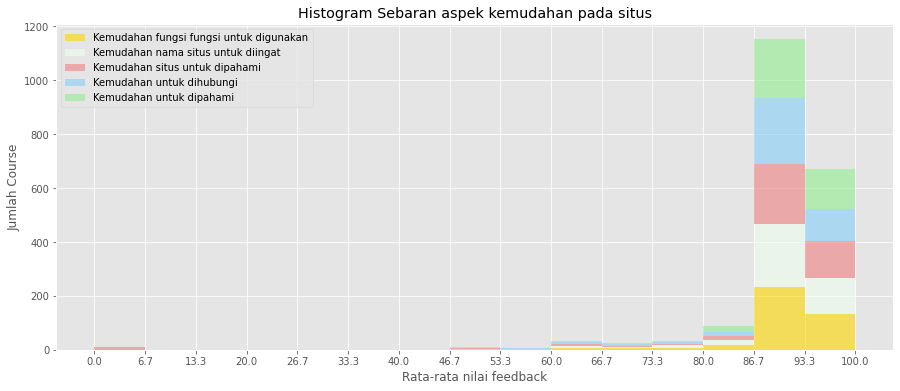

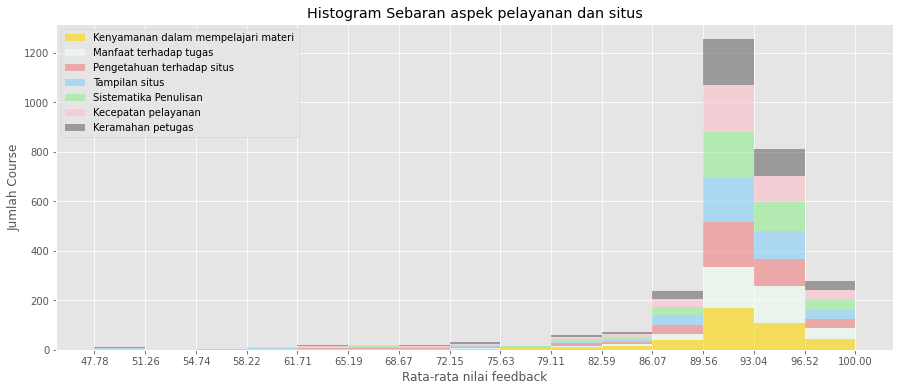

In [91]:
# defining colors
colors_list = ['gold', 'honeydew', 'lightcoral', 
               'lightskyblue', 'lightgreen', 'pink', 
               'dimgray','red','darkseagreen','teal','navy',
              'hotpink','deepskyblue']

# getting bin edges data in order to match grid and histogram
count, bin_edges = np.histogram(feedback_distribution_kemudahan, 15)
count2, bin_edges2 = np.histogram(feedback_distribution_pelayanan, 15)

# setting kelompok kemudahan plot
feedback_distribution_kemudahan.plot(kind='hist',                                              
            stacked=True,
            bins=15,
            alpha=0.6,   
            xticks=bin_edges,
            color=colors_list, 
            figsize=(15, 6))

# setting and showing kelompok kemudahan plot
plt.title('Histogram Sebaran aspek kemudahan pada situs')
plt.ylabel('Jumlah Course')
plt.xlabel('Rata-rata nilai feedback')

# setting kelompok pelayanan plot
feedback_distribution_pelayanan.plot(kind='hist',                    
          bins=15,
          stacked=True,
          alpha=0.6,   
          xticks=bin_edges2,
          color=colors_list, 
          figsize=(15, 6))

# setting and showing kelompok pelayanan plot
plt.title('Histogram Sebaran aspek pelayanan dan situs')
plt.ylabel('Jumlah Course')
plt.xlabel('Rata-rata nilai feedback')
plt.show()

#### Analisis
Terlihat pada aspek Kemudahan situs, sebaran nilai feedback sudah baik, dimana mayoritas Course __dinilai condong ke kanan di angka 86.7 - 100.__ Sedangkan aspek pelayanan dan situs juga sudah baik dimana mayoritas Course __dinilai condong ke kanan, di angka 89.56 - 100__

# Box Plot
#### Question:
Bagaimana distribusi data akses setiap category course dalam periode 1 tahun ?

In [92]:
# selecting, summarizing and pivoting data
top5course = feedback_elearning[['Bulan','Category', 'Jumlah Partisipan']]
top5course = top5course.groupby(['Bulan', 'Category']).sum().reset_index()
top5course = top5course.pivot(index='Bulan', columns='Category')['Jumlah Partisipan']

# Sorting Columns 
s = top5course.sum()
top5course = top5course[s.sort_values(ascending=False).index]
top5course

Category,Top & New Courses,Digital & ICT (EL-DIC),General (EL-GNR),Commerce & Relations (EL-COR),TELKOMSEL,Business Enabler / Enterprise Management (EL-EEM),CLASSICAL SUPPORT,Risk & Compliance (EL-RIC),Strategic Plan & Development (EL-SPD),ADMEDIKA,Profressional (EL-PRO),SSI,SIGMA
Bulan,,,,,,,,,,,,,
1,192.0,1272.0,171.0,54.0,NaN,17.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN
2,715.0,2781.0,350.0,671.0,NaN,35.0,390.0,1.0,5.0,8.0,NaN,NaN,NaN
3,704.0,2565.0,907.0,774.0,NaN,133.0,523.0,34.0,9.0,7.0,NaN,10.0,4.0
4,1500.0,4288.0,3463.0,170.0,NaN,236.0,2.0,32.0,18.0,12.0,18.0,13.0,NaN
5,838.0,1763.0,1096.0,85.0,NaN,260.0,3.0,10.0,7.0,4.0,8.0,13.0,28.0
6,4978.0,4160.0,1858.0,674.0,NaN,258.0,NaN,10.0,8.0,6.0,10.0,7.0,14.0
7,3670.0,2506.0,924.0,2877.0,NaN,99.0,NaN,12.0,10.0,5.0,10.0,2.0,2.0
8,3447.0,1638.0,189.0,2757.0,NaN,142.0,NaN,5.0,4.0,29.0,6.0,NaN,NaN
9,4817.0,820.0,340.0,90.0,2435.0,312.0,NaN,4.0,5.0,NaN,8.0,12.0,NaN


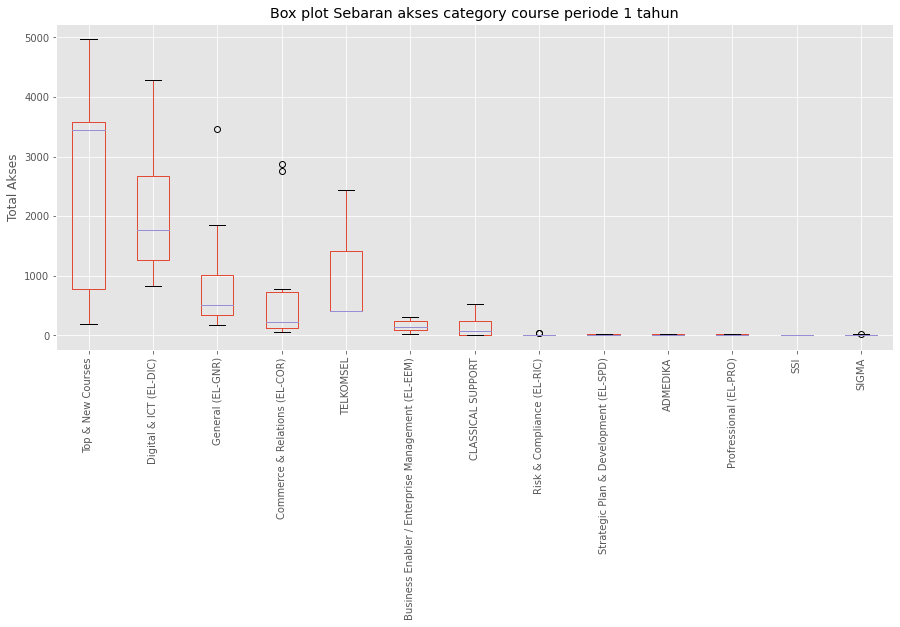

In [93]:
# setting top5course for plot
top5course.plot(kind='box', 
                figsize=(15, 6)
               )

# setting and displaying plot
plt.title('Box plot Sebaran akses category course periode 1 tahun')
plt.ylabel('Total Akses')
plt.xticks(rotation=90)
plt.show()

#### Analisis
Terlihat sebaran akses dari masing-masing category course, dimana kategori dengan akses tertinggi adalah 'Top & New Courses' dan terlihat bahwa median condong menuju Kuartil 3 atau memiliki kemiringan yang negatif (negatif skewness) dan akses bisa dikatakan stabil di sekitar angka 3500. Selanjutnya Category Digital & ICT, General dan commerce & relations yang memiliki kemiringan positif (positive skewness) namun Category General dan Commerce & relations memiliki jumlah akses outliers

# Scatter Plot
#### Question:
Bagaimana korelasi nilai feedback 'manfaat terhadap tugas' dengan 'Final Score' ?

In [94]:
# Selecting data
manfaat_finalscore = feedback_elearning[feedback_elearning.Category=='Top & New Courses']

# query('Category=='Top & New Courses'')
manfaat_finalscore = manfaat_finalscore[['Manfaat terhadap tugas', 'Final Score']]
manfaat_finalscore.head()

,Manfaat terhadap tugas,Final Score
99,100.00,100.00
100,97.86,96.20
101,90.00,82.50
102,91.88,91.51
103,89.63,89.53


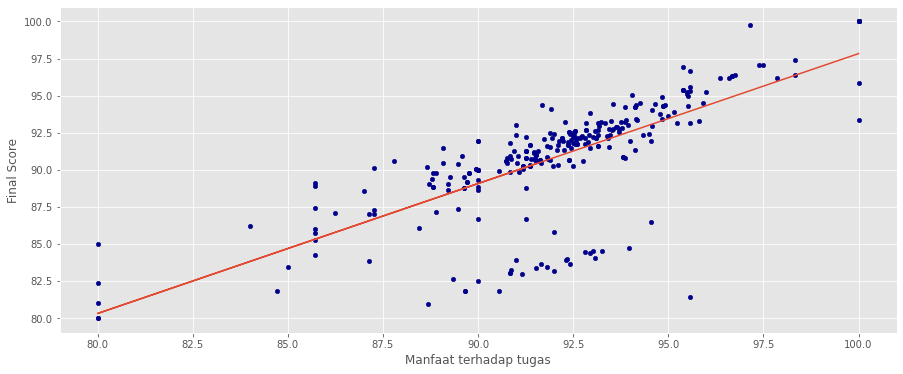

In [95]:
# setting scatter plot
manfaat_finalscore.plot(kind='scatter', x='Manfaat terhadap tugas', y='Final Score', figsize=(15, 6), color='darkblue')

# plotting linear regression
m, b = np.polyfit(manfaat_finalscore['Manfaat terhadap tugas'], manfaat_finalscore['Final Score'], 1)
plt.plot(manfaat_finalscore['Manfaat terhadap tugas'], m*manfaat_finalscore['Manfaat terhadap tugas'] + b)

In [96]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# get correlation from pearson & spearman
corr, _ = pearsonr(manfaat_finalscore['Manfaat terhadap tugas'], manfaat_finalscore['Final Score'])
corr2, _ = spearmanr(manfaat_finalscore['Manfaat terhadap tugas'], manfaat_finalscore['Final Score'])
print('Korelasi Pearson: %.3f' %corr)
print('Korelasi Spearman: %.3f' %corr2)

Korelasi Pearson: 0.734
Korelasi Spearman: 0.808


#### Analisis
Pada category Top & New Courses, nilai feedback 'manfaat terhadap tugas', memiliki korelasi positif dengan 'total skor' feedback, sehingga __semakin tinggi nilai feedback 'manfaat terhadap tugas', maka akan semakin tinggi 'total skor' feedback__

# Word Cloud
#### Question:
Apa keyword terpopuler dari seluruh judul course ?

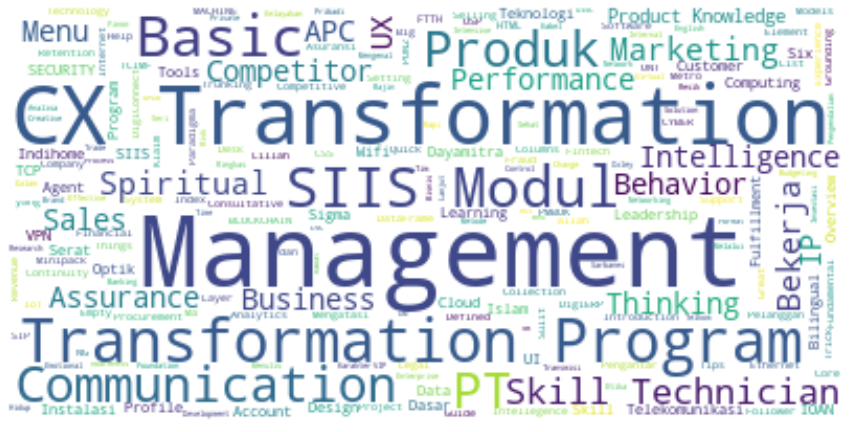

In [97]:
# Course yang sering diakses

from wordcloud import WordCloud, STOPWORDS

# define stopwords
stopwords = set(STOPWORDS)

# get, select, store and modify data
courseonly = feedback_elearning[['Course']]
courseonly = courseonly.set_index('Course').to_string()

# setting wordcloud
mostcourse_wc = WordCloud(
    background_color='white',
    stopwords=stopwords
)

# generate the word cloud
mostcourse_wc.generate(courseonly)


# Setting and show plot
plt.figure(figsize=(15,20))
plt.imshow(mostcourse_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Analisis
Terlihat bahwa keyword course yang memiliki kata 'Management', 'CX Transformation', 'SIIS Modul', 'Transformation Program' dan 'Produk' adalah course yang paling sering diakses

# Folium Maps

In [98]:
# implemented London Maps
import folium

# setting longlat kota london
london_map = folium.Map(location=['51.5287352','-0.3817853'], zoom_start=8)
london_map